In [1]:
#pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [52]:
pip install tensorflow

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.3/236.3 MB 40.8 MB/s eta 0:00:0000:0100:01
Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
Using cached flatbuffers-24.3.25-py2.py3-none-any.whl (26 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 26.8 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 30.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 31.8 MB/s eta 0:00:00
Using cached markdown_it_py-3.0.0-py3-none-any.whl (87 kB)
Using cached mdurl-0.1.2-py3-none-any.whl (10.0 kB)
No

## Imports

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.model_selection import train_test_split
from scipy.sparse import coo_matrix, csr_matrix
from scipy.spatial.distance import jaccard, cosine 
from sklearn.decomposition import NMF
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

## Import UC Wine Data

In [7]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
  
# metadata 
print(wine_quality.metadata) 
  
# variable information 
print(wine_quality.variables) 

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

## Analyze the Data

In this stage of the process, I am going to do a little analysis of the data. I will look at what feature types we have, the variation in the values of each feature and how important each feature is to predict the overall quaity of the wine.

### Verfify the data loaded

In [8]:
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [9]:
y.head()

,quality
0,5
1,5
2,5
3,6
4,5


## Check variations of values

In [10]:
# Printing the min, max, and standard deviation for each column
print("Min values:\n", X.min())
print("\nMax values:\n", X.max())
print("\nStandard deviation values:\n", X.std())

Min values:
 fixed_acidity           3.80000
volatile_acidity        0.08000
citric_acid             0.00000
residual_sugar          0.60000
chlorides               0.00900
free_sulfur_dioxide     1.00000
total_sulfur_dioxide    6.00000
density                 0.98711
pH                      2.72000
sulphates               0.22000
alcohol                 8.00000
dtype: float64

Max values:
 fixed_acidity            15.90000
volatile_acidity          1.58000
citric_acid               1.66000
residual_sugar           65.80000
chlorides                 0.61100
free_sulfur_dioxide     289.00000
total_sulfur_dioxide    440.00000
density                   1.03898
pH                        4.01000
sulphates                 2.00000
alcohol                  14.90000
dtype: float64

Standard deviation values:
 fixed_acidity            1.296434
volatile_acidity         0.164636
citric_acid              0.145318
residual_sugar           4.757804
chlorides                0.035034
free_sulfur_dioxid

In [11]:
# Printing the min, max, and standard deviation for each column
print("Min values:\n", y.min())
print("\nMax values:\n", y.max())
print("\nStandard deviation values:\n", y.std())

Min values:
 quality    3
dtype: int64

Max values:
 quality    9
dtype: int64

Standard deviation values:
 quality    0.873255
dtype: float64


## Check Feature Importance

In [12]:
rf = RandomForestClassifier(random_state=42)

# Fit the model to the data
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

/opt/homebrew/Cellar/jupyterlab/4.1.6_1/libexec/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


                 Feature  Importance
10               alcohol    0.123697
7                density    0.103130
1       volatile_acidity    0.100264
6   total_sulfur_dioxide    0.091147
4              chlorides    0.088163
5    free_sulfur_dioxide    0.086409
9              sulphates    0.085726
3         residual_sugar    0.084419
8                     pH    0.083949
2            citric_acid    0.078167
0          fixed_acidity    0.074927


## Visualize Feature Importance for each feature

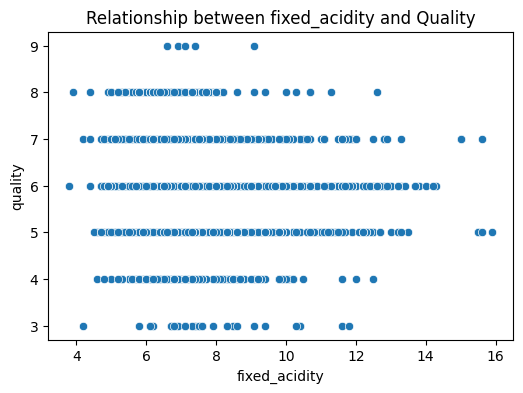

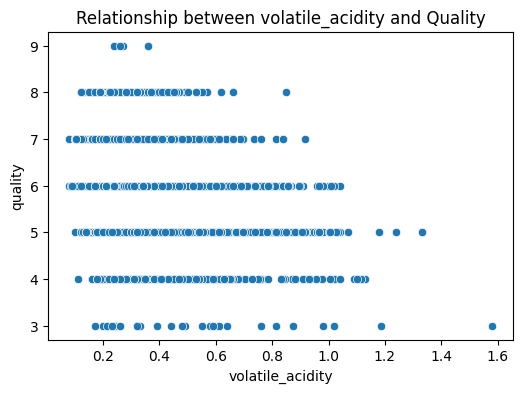

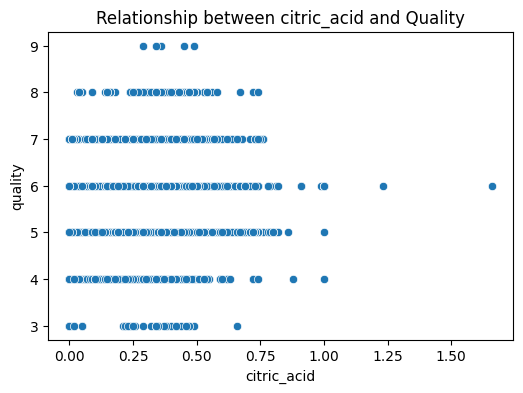

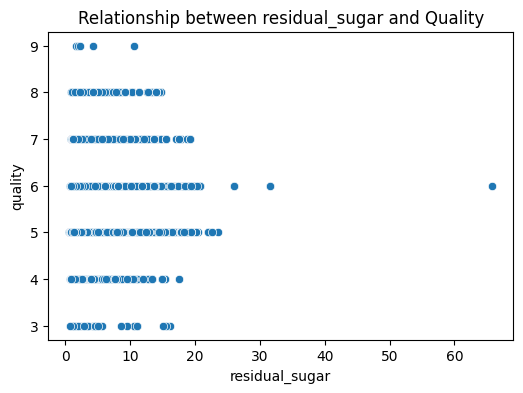

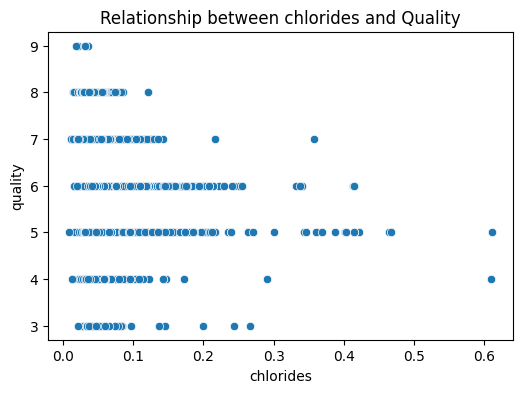

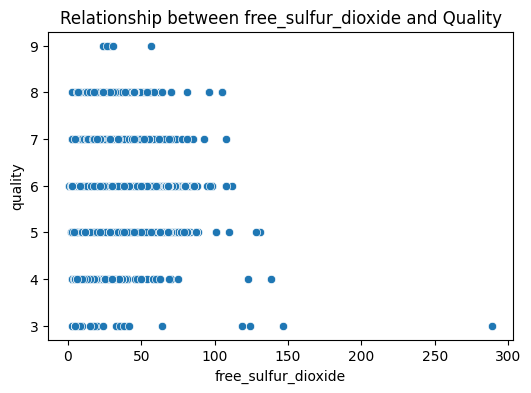

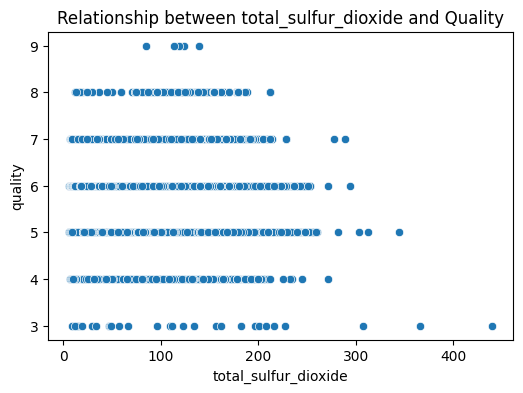

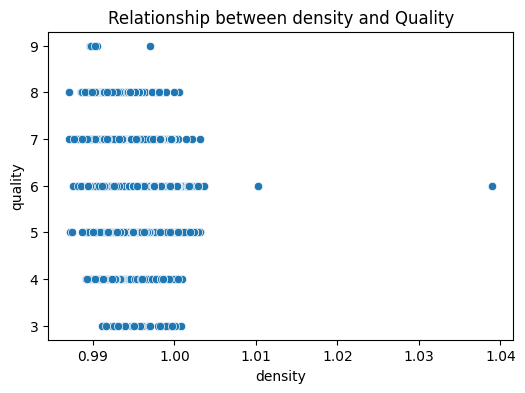

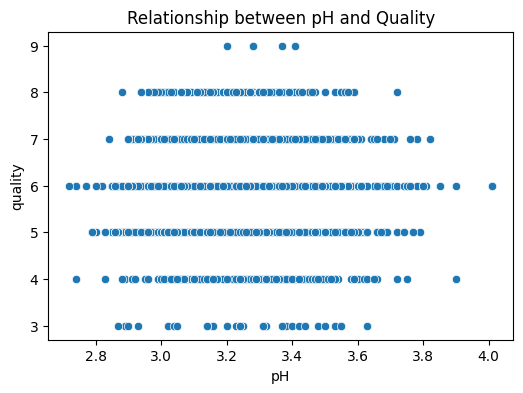

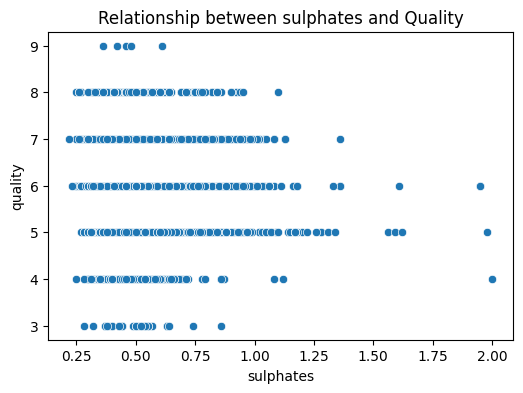

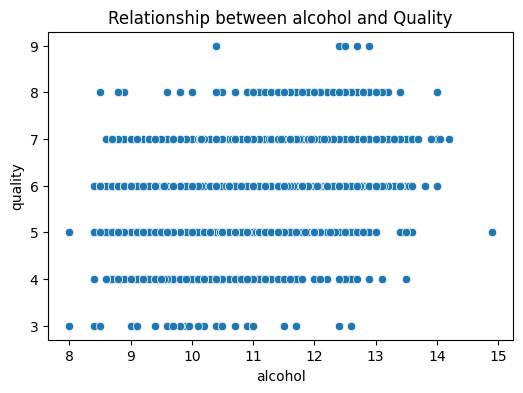

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of alcohol vs quality
for column in X.columns:
    if column == 'quality':
        break
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X[column], y=y["quality"])
    plt.title(f"Relationship between {column} and Quality")
    plt.show()

# Model Proposal

In this notebook, I am going to create 4 clusters of wine. These clusters will be considered taste profiles. With these 4 clusters of data, I will then train 4 autoencoders. These autoencoders will then be used to reccomend a wine to a user. For example, a user belongs to cluster 1. A wine similar to their cluster will have a low Reconstruction error so they will like it. If it is high, we will say they will not like it.

## Pre-processing

In [42]:
wine_quality = pd.concat([X, y], axis=1)

In [43]:
from sklearn.cluster import KMeans
import pandas as pd

# Create kmeans model to cluster the different wines
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(wine_quality)  

# Add cluster labels to the dataset
wine_quality['Cluster'] = clusters

In [44]:
wine_quality['Cluster']

0       2
1       3
2       2
3       2
4       2
       ..
6492    3
6493    1
6494    3
6495    3
6496    3
Name: Cluster, Length: 6497, dtype: int32

## Viuslaize the Clusters

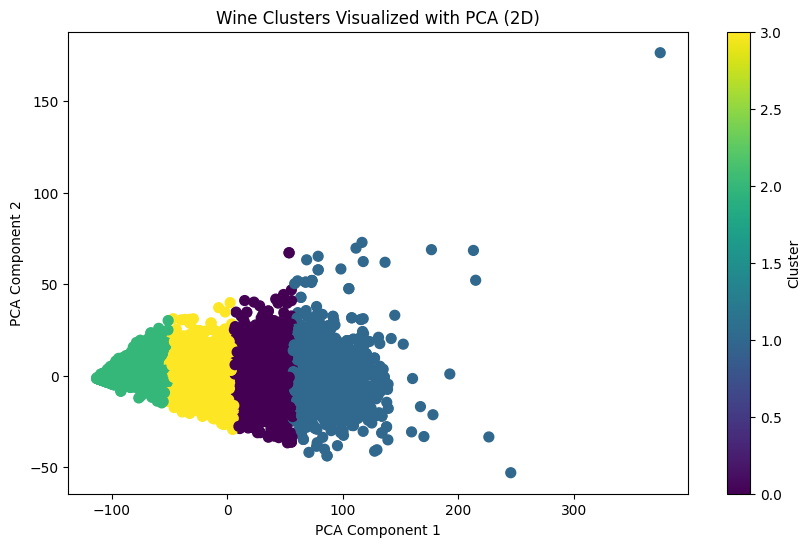

In [45]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to reduce the dimensionality to 2 components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=wine_quality['Cluster'], cmap='viridis', s=50)
plt.title('Wine Clusters Visualized with PCA (2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

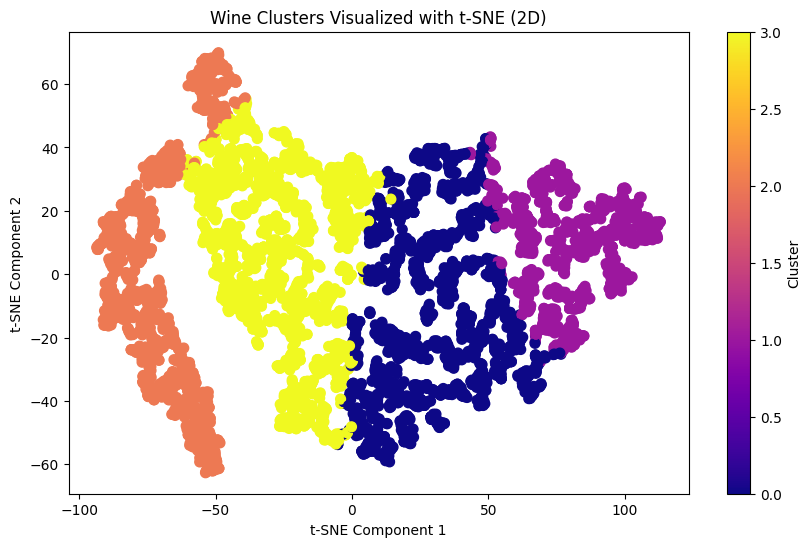

In [46]:
from sklearn.manifold import TSNE

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=wine_quality['Cluster'], cmap='plasma', s=50)
plt.title('Wine Clusters Visualized with t-SNE (2D)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [47]:
wine_quality

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Cluster
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,3
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,3
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,3
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,3


## Test the model

In [63]:
import numpy as np

# Select 5 wines by indices
selected_indices = [10, 23, 45, 100, 220]  # Example selection of indices
selected_wines = wine_quality.iloc[selected_indices]

# Aggregate selected wines
aggregated_features = selected_wines.drop(columns=['Cluster']).mean()

# Predict cluster
user_cluster = kmeans.predict([aggregated_features])[0]  # Get the cluster number

# Simulate user picking a wine
random_wine = wine_quality.sample(1).drop(columns=['Cluster'])  # Pick a random wine

# Predict the cluster
predicted_cluster = kmeans.predict(random_wine)[0]

# Provide recommendation 
if predicted_cluster == user_cluster:
    print("We recommend this wine for you.")
else:
    print("We do not think you will enjoy this wine.")

We recommend this wine for you.


/opt/homebrew/Cellar/jupyterlab/4.1.6_1/libexec/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [84]:
cluster_names = {
    0: "Elegant Reds",
    1: "Bold Whites",
    2: "Fruity Rosés",
    3: "Sparkling Delights"
}


## Demo Wine Recommender


In [85]:
selected_indices = input("Please enter 5 wine indices separated by commas: ").split(',')
selected_indices = [int(i.strip()) for i in selected_indices]  


Please enter 5 wine indices separated by commas:  20, 55, 40, 345, 400


In [86]:
selected_wines = wine_quality.iloc[selected_indices]
aggregated_features = selected_wines.drop(columns=['Cluster']).mean()
print("Analyzing your wine profile...")

Analyzing your wine profile...


In [87]:
user_cluster = kmeans.predict([aggregated_features])[0]  
user_cluster_name = cluster_names[user_cluster] 
print("Determining your wine group...")

Determining your wine group...


/opt/homebrew/Cellar/jupyterlab/4.1.6_1/libexec/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [88]:
print(f"You belong to the '{user_cluster_name}' group!")

You belong to the 'Elegant Reds' group!


In [93]:
selected_index = input("Please enter a wine index: ").split(',')
selected_wine = wine_quality.iloc[selected_index]

Please enter a wine index:  2


In [94]:
random_wine = selected_wine.drop(columns=['Cluster'])  
predicted_cluster = kmeans.predict(random_wine)[0]
predicted_cluster_name = cluster_names[predicted_cluster]
print("Processing wine selection...")

Processing wine selection...


In [95]:
if predicted_cluster == user_cluster:
    print(f"This wine also belongs to the '{predicted_cluster_name}' group. We recommend this wine for you!")
else:
    print(f"This wine belongs to the '{predicted_cluster_name}' group. We do not think you will enjoy this wine.")

This wine belongs to the 'Sparkling Delights' group. We do not think you will enjoy this wine.
